In [1]:
# importing all the package what we want for the project 
import numpy as np #Numpy arrays are very fast and can perform large computations in a very short time. 
import pandas as pd #it help us to load the data frame in 2d formate and having different types of coloums and
import matplotlib.pyplot as plt #This library is used to draw visualizations.Sklearn this module containing many libraries
#and many implementing functions
#import seaborn as sb

# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import math as mat

C:\Users\srich\AppData\Local\Temp\ipykernel_7056\1285059257.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
df = pd.read_csv('modified reliance.csv')
df.head()#importing the data set and printing it

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,16.009800,16.095699,15.904300,16.0683,2.422041,47600787.0
1,1996-01-02,16.029301,16.107401,15.826200,15.9434,2.403215,77143764.0
2,1996-01-03,16.205000,16.943001,16.029301,16.0644,2.421453,95695836.0
3,1996-01-04,15.912100,15.962900,15.701300,15.9160,2.399085,99159504.0
4,1996-01-05,15.853600,15.853600,15.670000,15.8067,2.382609,76213503.0


In [3]:
df.isnull().sum()
#checking any null values are present in the data set 


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()


,Open-Close,High-Low
0,-0.058500,0.191399
1,0.085901,0.281201
2,0.140600,0.913700
3,-0.003900,0.261600
4,0.046900,0.183600


In [5]:
# Target variables this conforms that if it is 0 then it is no position and if it is 1 it iws like we can buy the stocks
# it may increase in the feture 
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 1, 0, ..., 0, 1, 0])

In [6]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]


In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer

# Generate a random classification dataset with NaN values
X, y = make_classification(n_samples=6305, n_features=9, random_state=42)
X_with_nan = X.copy()
X_with_nan[0, 0] = float('nan')  # Insert a NaN value as an example

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_nan, y, test_size=0.2, random_state=42)

# Impute missing values with mean (you can choose other strategies as well)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', random_state=42)

# Train the classifier
mlp.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test_imputed)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate the precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Accuracy: 0.9056304520222046
F1 Score: 0.9053301511535402
Precision: 0.9074960127591707
Recall: 0.9031746031746032


In [8]:
df.shape

(6305, 9)

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.91      0.91       631
           1       0.91      0.90      0.91       630

    accuracy                           0.91      1261
   macro avg       0.91      0.91      0.91      1261
weighted avg       0.91      0.91      0.91      1261



Confusion matrix

 [[573  58]
 [ 61 569]]

True Positives(TP) =  573

True Negatives(TN) =  569

False Positives(FP) =  58

False Negatives(FN) =  61


<Axes: >

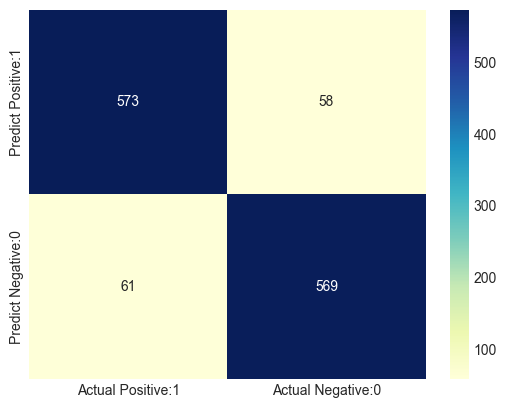

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')